In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from perceptron_v2 import perceptron

In [3]:
def train_test_split(data, training_ratio=0.7):
    train_sample_size = np.int_(data.shape[0]*training_ratio)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:, :]

# Regression for Bivariate data

In [4]:
file = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Regression/BivariateData/10.csv'
df = pd.read_csv(file, header=None)
df.head()

,0,1,2
0,0.21,0.86,0.56319
1,0.24,0.95,0.52729
2,0.31,0.23,1.14150
3,0.98,0.42,1.78900
4,0.93,0.34,1.66360


In [5]:
data = df.to_numpy(dtype=float, copy=True)
data.shape

(10201, 3)

In [6]:
elivation, az_angle = 30, 40

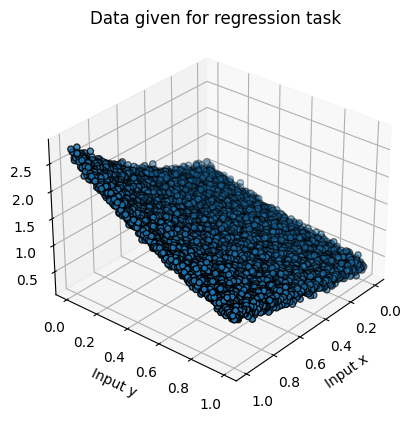

In [7]:
ax = plt.axes(projection='3d')
ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
ax.set_title('Data given for regression task')
plt.show()

In [8]:
train_data, test_data = train_test_split(data)
train_data.shape, test_data.shape

((7140, 3), (3061, 3))

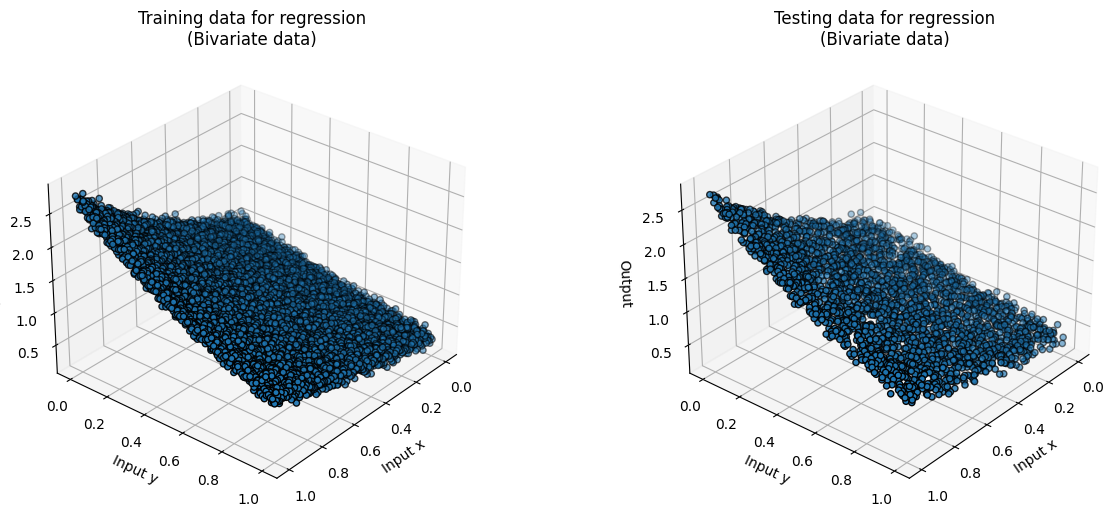

In [9]:
plt.figure()
ax = plt.subplot(1,2,1, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Training data for regression\n(Bivariate data)')

ax = plt.subplot(1,2,2, projection='3d')
ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], edgecolor='black')
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Testing data for regression\n(Bivariate data)')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.show()

In [10]:
neta = 0.0005
regressor = perceptron(n_features=2, activation='linear', learning_rate=neta, max_epoch=100)
epoch_err = regressor.fit_regression(train_data)

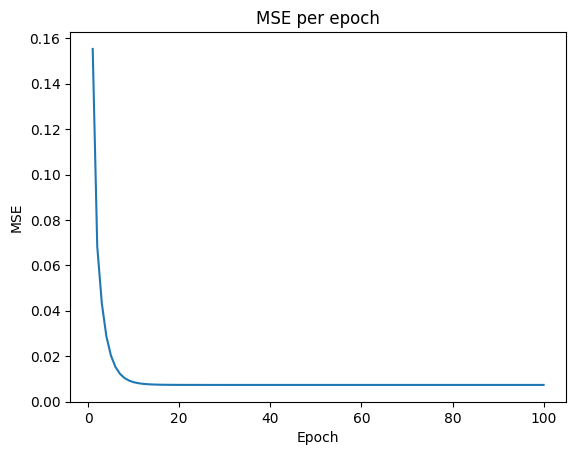

In [11]:
plt.figure()
plt.title("MSE per epoch")
plt.plot(range(1, len(epoch_err)+1), epoch_err)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [12]:
# line_x = np.arange(0, 1, 0.05)
# line_y = np.arange(0, 1, 0.05)
# xx, yy = np.meshgrid(line_x, line_y)
# xx = xx.reshape((-1, 1))
# yy = yy.reshape((-1, 1))
# plane = np.concatenate((xx, yy), axis=1)

In [13]:
pred = []
for point in train_data[:, :-1]:
    pred.append(regressor.predict_regress(point))

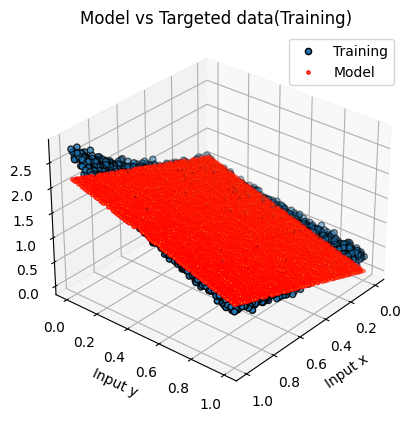

In [14]:
ax = plt.axes(projection='3d')
ax.scatter(train_data[:, 0], train_data[:, 1], train_data[:, 2], edgecolor='black', label='Training')
ax.scatter(train_data[:, 0], train_data[:, 1], pred, marker='.', label='Model', edgecolors='red')
plt.legend()
ax.set_xlabel('Input x')
ax.set_ylabel('Input y')
ax.set_zlabel('Output')
ax.view_init(elivation, az_angle)
plt.title('Model vs Targeted data(Training)')
plt.show()


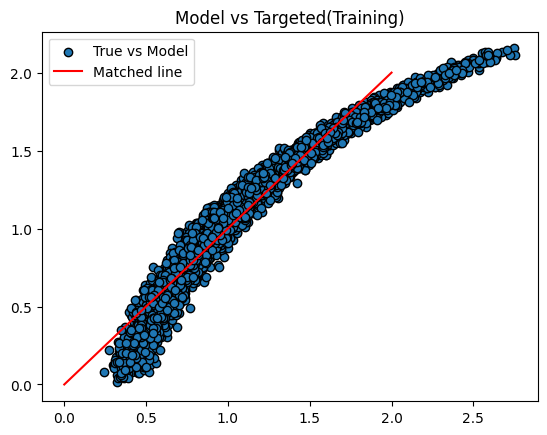

In [20]:
plt.scatter(train_data[:, 2], pred, label='True vs Model', edgecolors='black')
plt.plot([0,2], [0, 2], color='red', label='Matched line')
plt.title('Model vs Targeted(Training)')
plt.legend()
plt.show()

## Testing

In [15]:
true_output = test_data[:, -1:]
pred_output = []
for point in test_data[:, :-1]:
    pred_output.append(regressor.predict_regress(point))

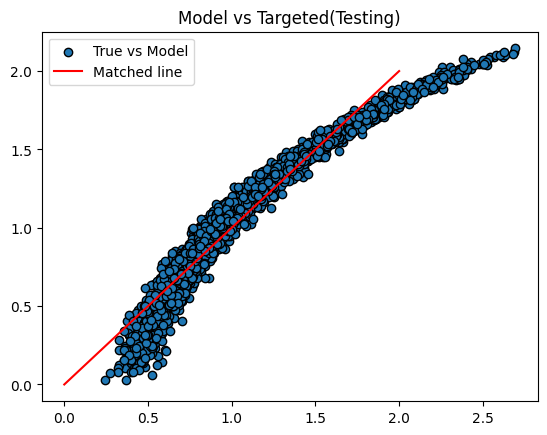

In [21]:
plt.scatter(test_data[:, 2], pred_output, label='True vs Model', edgecolors='black')
plt.plot([0,2], [0, 2], color='red', label='Matched line')
plt.title('Model vs Targeted(Testing)')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(true_output, pred_output)
mse_test

0.015145113611294376

In [17]:
train_output = train_data[:, -1:]
learned_output = [regressor.predict_regress(point) for point in train_data[:, :-1]]
mse_train = mean_squared_error(train_output, learned_output)
mse_train

0.01463541603142469

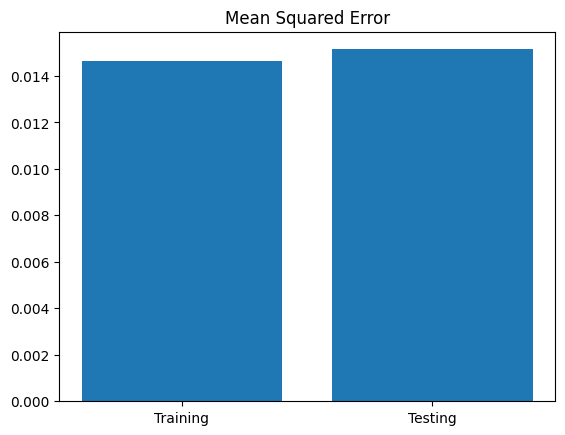

In [18]:
plt.bar(['Training', 'Testing'], [mse_train, mse_test])
plt.title('Mean Squared Error')
plt.show()